In [1]:
# Dependencies
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

In [2]:
# Import scraped data
df = pd.read_csv('Data/fires.csv')
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
0,2012,C10075 (2012),Cariboo,52 44.747,124 22.619,Bald Face Mountain,"July 14, 2012",13.0
1,2012,C10118 (2012),Cariboo,52 41.849,123 00.607,Quesnel-Merston Creek,"July 19, 2012",6.0
2,2012,C10247 (2012),Cariboo,53 03.159,122 58.020,11B Road Blackwater,"October 17, 2012",20.0
3,2012,C10250 (2012),Cariboo,52 30.773,122 26.629,Margeurite,"March 30, 2013",8.0
4,2012,C20005 (2012),Cariboo,52 07.676,121 54.904,150 Mile House-330 Valley Rd,"April 7, 2012",12.2


<AxesSubplot:>

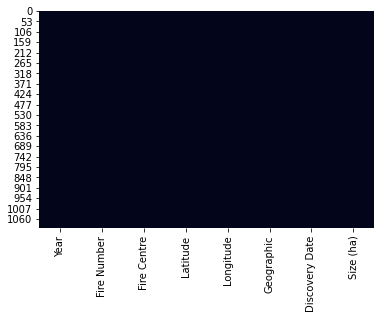

In [3]:
# Check for null values (if there are no null values the plot will be all black)
sns.heatmap(df.isnull(), cbar=False)

### Response Variable - Fire Size

C:\Users\jvanzalk\anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


<AxesSubplot:xlabel='Size (ha)'>

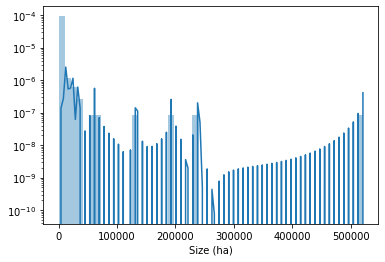

In [6]:
# Check distribution for response variable - fire size
sns.distplot(df['Size (ha)'])

In [5]:
# Get distribution stats 
df['Size (ha)'].describe()

count      1108.000000
mean       1880.844005
std       18986.542475
min           5.000000
25%          10.000000
50%          26.650000
75%         155.325000
max      521012.000000
Name: Size (ha), dtype: float64

In [6]:
# # The average size fire is 1108 hectares (ha), but there are some as big as 521012 ha
# # Remove outliers (greater than 3 sds from mean)
# df = df[(np.abs(stats.zscore(df['Size (ha)'])) < 3)].reset_index()
# len(df)

In [7]:
# # Distribution is heavily right skewed so values need to be transformed
# df['Size (ha)'].skew()

In [8]:
# # Try different transformation methods
# print('log: ', np.log(df['Size (ha)']).skew())
# print('square root: ', np.sqrt(df['Size (ha)']).skew())
# ha_boxcox = stats.boxcox(df['Size (ha)'])[0]
# print('box-cox: ', pd.Series(ha_boxcox).skew())

In [9]:
# # The box-cox transformation is the most effective in reducing skew
# ha_boxcox, fitted_lambda = stats.boxcox(df['Size (ha)'])
# df['Size (ha)'] = pd.Series(ha_boxcox)
# # inv_boxcox(y,fitted_lambda)

In [10]:
# # Distribution looks much better
# sns.distplot(df['Size (ha)'])

### Fire Location

In [7]:
# Create function to convert lat and long from DDM to DD 
def todd(ddm):
    
    degrees = ddm.str.split(' ').str[0].astype(int)
    minutes = ddm.str.split(' ').str[1].astype(float)
    dd= degrees + (minutes/60)
    
    return dd

In [8]:
df['Latitude'] = todd(df['Latitude'])
df['Longitude'] = todd(df['Longitude'])*-1 # Multiply longitude by -1 because this is in the western hemisphere
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
0,2012,C10075 (2012),Cariboo,52.745783,-124.376983,Bald Face Mountain,"July 14, 2012",13.0
1,2012,C10118 (2012),Cariboo,52.697483,-123.010117,Quesnel-Merston Creek,"July 19, 2012",6.0
2,2012,C10247 (2012),Cariboo,53.052650,-122.967000,11B Road Blackwater,"October 17, 2012",20.0
3,2012,C10250 (2012),Cariboo,52.512883,-122.443817,Margeurite,"March 30, 2013",8.0
4,2012,C20005 (2012),Cariboo,52.127933,-121.915067,150 Mile House-330 Valley Rd,"April 7, 2012",12.2


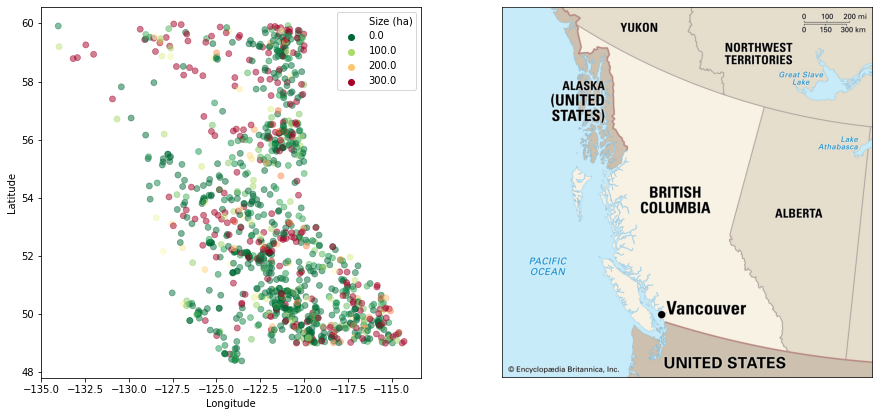

In [9]:
# Plotting lat and long takes shape of British Columbia and shows hotspots for fires
bc_map = np.uint8(img.imread('Images/BC_map.jpg'))

fig = plt.figure(figsize=(15,15))

fig.add_subplot(221)
ax = sns.scatterplot('Longitude','Latitude',data=df,hue='Size (ha)',hue_norm=(10,300),edgecolor=None, alpha=0.5, palette='RdYlGn_r')

fig.add_subplot(222)
plt.imshow(bc_map)
plt.axis('off')

# plt.savefig('Images/hotspots.png')

plt.show()

There doesn't appear to be any obvious relationship between long or lat and fire size. Fire size is probably more dependent on proximity to people, slope of terrain, etc.

### Date

We expect that temperature to have a strong relationship with fire size. We can't get temperature data, so will use date as a proxy.

In [10]:
# Extract month from date
df['Discovery Date'] = pd.to_datetime(df['Discovery Date'])
df['month'] = df['Discovery Date'].apply(lambda date: date.month)
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha),month
0,2012,C10075 (2012),Cariboo,52.745783,-124.376983,Bald Face Mountain,2012-07-14,13.0,7
1,2012,C10118 (2012),Cariboo,52.697483,-123.010117,Quesnel-Merston Creek,2012-07-19,6.0,7
2,2012,C10247 (2012),Cariboo,53.052650,-122.967000,11B Road Blackwater,2012-10-17,20.0,10
3,2012,C10250 (2012),Cariboo,52.512883,-122.443817,Margeurite,2013-03-30,8.0,3
4,2012,C20005 (2012),Cariboo,52.127933,-121.915067,150 Mile House-330 Valley Rd,2012-04-07,12.2,4


<AxesSubplot:xlabel='month', ylabel='Size (ha)'>

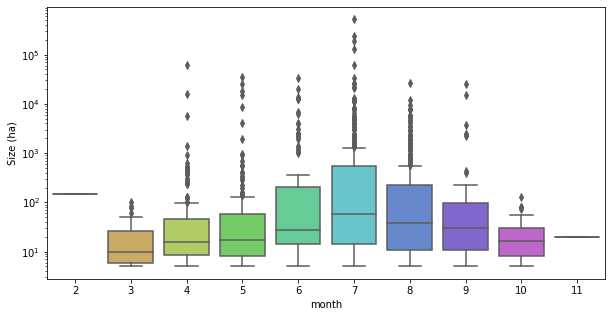

In [11]:
# Check how fire sizes vary by month
plt.figure(figsize=(10,5))
plt.yscale("log")
sns.boxplot(x='month',y='Size (ha)',data=df,palette='hls')

In [12]:
# No fires were reported in Jan or Dec
# Rather than creating a dummy variable for each month, create dummy variables for seasons
cols = ['spring','summer','autumn']
for col in cols:
    df[col] = 0 

df.loc[df['Discovery Date'].dt.dayofyear.between(79, 171),'spring'] = 1
df.loc[df['Discovery Date'].dt.dayofyear.between(172, 264),'summer'] = 1
df.loc[df['Discovery Date'].dt.dayofyear.between(265, 355),'autumn'] = 1

df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha),month,spring,summer,autumn
0,2012,C10075 (2012),Cariboo,52.745783,-124.376983,Bald Face Mountain,2012-07-14,13.0,7,0,1,0
1,2012,C10118 (2012),Cariboo,52.697483,-123.010117,Quesnel-Merston Creek,2012-07-19,6.0,7,0,1,0
2,2012,C10247 (2012),Cariboo,53.052650,-122.967000,11B Road Blackwater,2012-10-17,20.0,10,0,0,1
3,2012,C10250 (2012),Cariboo,52.512883,-122.443817,Margeurite,2013-03-30,8.0,3,1,0,0
4,2012,C20005 (2012),Cariboo,52.127933,-121.915067,150 Mile House-330 Valley Rd,2012-04-07,12.2,4,1,0,0


In [13]:
#convert year to years - 2012
df['years_since_2012'] = df['Year']-2012
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha),month,spring,summer,autumn,years_since_2012
0,2012,C10075 (2012),Cariboo,52.745783,-124.376983,Bald Face Mountain,2012-07-14,13.0,7,0,1,0,0
1,2012,C10118 (2012),Cariboo,52.697483,-123.010117,Quesnel-Merston Creek,2012-07-19,6.0,7,0,1,0,0
2,2012,C10247 (2012),Cariboo,53.052650,-122.967000,11B Road Blackwater,2012-10-17,20.0,10,0,0,1,0
3,2012,C10250 (2012),Cariboo,52.512883,-122.443817,Margeurite,2013-03-30,8.0,3,1,0,0,0
4,2012,C20005 (2012),Cariboo,52.127933,-121.915067,150 Mile House-330 Valley Rd,2012-04-07,12.2,4,1,0,0,0


In [14]:
# Remove columns that we aren't going to use in our model
# Fire Centre is a region so we are removing it because it will likely cause multicolinearity issues with long and lat
df.drop(['Year','Fire Number','Fire Centre','Geographic','Discovery Date','month'], axis=1, inplace=True)
df.columns = ['lat','long','ha','spring','summer','autumn','years_since_2012']
df.tail()

,lat,long,ha,spring,summer,autumn,years_since_2012
1103,49.059733,-114.302483,15448.8,0,1,0,5
1104,49.622067,-115.700650,398.0,0,1,0,5
1105,50.345100,-115.599267,61.3,0,1,0,5
1106,49.094200,-114.702950,98.0,0,1,0,5
1107,49.614317,-116.177867,6.3,0,0,1,5


In [15]:
# Save clean df as csv
df.to_csv('Data/fires_cleaned.csv',index=False)